# Convolutional Neural Networks- filters and parameter sharing
A convolutional neural network, also known as ConvNet, is a specific type of feed-forward neural network where the network has one or multiple convolutional layers. The convolutional layers can be complemented with fully connected layers. If the network only contains convolutional layers, we name the network architecture a fully convolutional network (FCN). Convolutional networks and computer vision are inseparable in deep learning. However, CNNs can be used in other applications, such as in a wide variety of NLP problems. <br> 

Let's introduce the most important part of convolutional networks: convolutional layers. In a convolutional layer, we have blocks that convolve over the input data (like a sliding window). This technique shares parameters for each block in such a way that it can detect a feature within the block across the whole input data. The size of a block is called the **kernel size or filter size**. Summarized, the convolutional layer extracts local features within the total feature set. This is illustrated with an image as input data in the following figure:

![alt text][logo]

[logo]: https://github.com/sara-kassani/Python-Deep-Learning-Cookbook/blob/master/data/filter.png?raw=true "filters"

The input data can contain multiple different features, so this trick can be applied multiple times. This is called the number of filters or filter depth. Simply said, if we use a convolutional layerwith five filters on image data, the convolutional block tries to learn five different features in the images, for example the facial features such as the nose, eyes, mouth, ears, and eyebrows.<br> 
Although, these features are never explicitly specified, the network tries to learn valuable features itself.<br> 
For convolutional neural networks, it's advised to use an increasing number of filters, for example double the
number of filters for each convolutional layer: 32, 64, and 128.<br> 
In the following example, we will implement a convolutional neural network to classify the MNIST images

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.callbacks import EarlyStopping
from keras.datasets import mnist


Using TensorFlow backend.


### Load the mnist dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Reshape the training data to represent one-channel image input

In [3]:
img_rows, img_cols = X_train[0].shape[0], X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Normalize the input data

In [4]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

### One-hot encode the labels

In [5]:
n_classes = len(set(y_train))
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

### Define the CNN architecture

In [6]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Set network hyperparameters and the callback function

In [7]:
batch_size = 128
n_epochs = 200

callbacks = [EarlyStopping(monitor='val_acc', patience=5)]

### Train the model

In [8]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_split=0.2, callbacks=callbacks)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1566s 33ms/step - loss: 0.1986 - acc: 0.9402 - val_loss: 0.0544 - val_acc: 0.9842
Epoch 2/200
48000/48000 [==============================] - 1632s 34ms/step - loss: 0.0764 - acc: 0.9769 - val_loss: 0.0434 - val_acc: 0.9873
Epoch 3/200
48000/48000 [==============================] - 1439s 30ms/step - loss: 0.0535 - acc: 0.9840 - val_loss: 0.0413 - val_acc: 0.9884
Epoch 4/200
48000/48000 [==============================] - 1065s 22ms/step - loss: 0.0434 - acc: 0.9876 - val_loss: 0.0386 - val_acc: 0.9889
Epoch 5/200
48000/48000 [==============================] - 838s 17ms/step - loss: 0.0357 - acc: 0.9888 - val_loss: 0.0388 - val_acc: 0.9897
Epoch 6/200
48000/48000 [==============================] - 813s 17ms/step - loss: 0.0299 - acc: 0.9904 - val_loss: 0.0402 - val_acc: 0.9881
Epoch 7/200
48000/48000 [==============================] - 811s 17ms/step - loss: 0.0256 - acc: 0.9914 - v

### Show the results on the test set

Test loss: 0.0313496287054
Test accuracy: 0.991


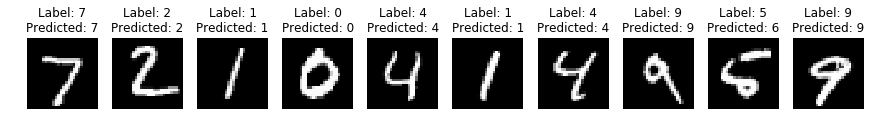

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Extract predictions
preds = model.predict(X_test)

n_examples = 10
plt.figure(figsize=(15, 15))
for i in range(n_examples):
    ax = plt.subplot(2, n_examples, i + 1)
    plt.imshow(X_test[i, :, :, 0], cmap='gray')
    plt.title("Label: {}\nPredicted: {}".format(np.argmax(y_test[i]), np.argmax(preds[i])))
    plt.axis('off')
    
plt.show()

### Plot the result

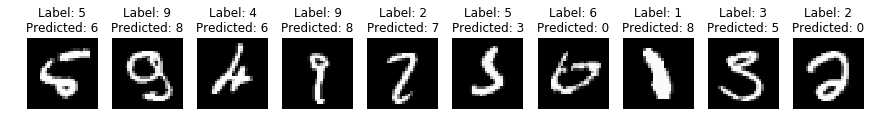

In [10]:
plt.figure(figsize=(15, 15))

j=1
for i in range(len(y_test)):
    if(j>10):
        break
    label = np.argmax(y_test[i])
    pred = np.argmax(preds[i])
    if label != pred:        
        ax = plt.subplot(2, n_examples, j)
        plt.imshow(X_test[i, :, :, 0], cmap='gray')
        plt.title("Label: {}\nPredicted: {}".format(label, pred))
        plt.axis('off')
        j+=1
plt.show()

As we can see in our output, some of the misclassified examples are actually really hard to predict. For
example, the 7th example with label 8 and predicted label 9